In [1]:
import pandas as pd
from utils import PA_EDA_Functions as eda

In [2]:
## Sample Dataset 2: 2013
df_20_cont=eda.initialize_cont_year("../data/2020/contrib_2020.txt", 2020)
df_20_fil =eda.initialize_filer_year("../data/2020/filer_2020.txt", 2020)

# regex : 

In [3]:
df_20_cont.head(10)

,FilerID,EYear,Cycle,Section,Contributor,Address1,Address2,City,State,Zipcode,...,EState,EZipcode,ContDate1,ContAmt1,ContDate2,ContAmt2,ContDate3,ContAmt3,ContDesc,TotalContAmt
0,8100264,2020,2,IB,Kate E Cianchetta,145 W 11th Ave,Apt 1,Conshohocken,PA,194281417,...,<NA>,<NA>,20200416,10.0,0,0.0,0,0.0,<NA>,10.0
1,8100264,2020,2,IB,Kate E Cianchetta,145 W 11th Ave,Apt 1,Conshohocken,PA,194281417,...,<NA>,<NA>,20200514,10.0,0,0.0,0,0.0,<NA>,10.0
2,8100264,2020,2,IB,Walter Cioccia,15 Christopher Dr,<NA>,Long Valley,NJ,078533006,...,<NA>,<NA>,20200206,10.0,0,0.0,0,0.0,<NA>,10.0
3,8100264,2020,2,IB,Walter Cioccia,15 Christopher Dr,<NA>,Long Valley,NJ,078533006,...,<NA>,<NA>,20200305,10.0,0,0.0,0,0.0,<NA>,10.0
4,8100264,2020,2,IB,Walter Cioccia,15 Christopher Dr,<NA>,Long Valley,NJ,078533006,...,<NA>,<NA>,20200319,10.0,0,0.0,0,0.0,<NA>,10.0
5,8100264,2020,2,IB,Walter Cioccia,15 Christopher Dr,<NA>,Long Valley,NJ,078533006,...,<NA>,<NA>,20200416,10.0,0,0.0,0,0.0,<NA>,10.0
6,8100264,2020,2,IB,Susan A Clarke-Johnson,7948 Preservation Dr,<NA>,Indianapolis,IN,462789545,...,<NA>,<NA>,20200109,10.0,0,0.0,0,0.0,<NA>,10.0
7,8100264,2020,2,IB,Susan A Clarke-Johnson,7948 Preservation Dr,<NA>,Indianapolis,IN,462789545,...,<NA>,<NA>,20200206,10.0,0,0.0,0,0.0,<NA>,10.0
8,8100264,2020,2,IB,Susan A Clarke-Johnson,7948 Preservation Dr,<NA>,Indianapolis,IN,462789545,...,<NA>,<NA>,20200220,10.0,0,0.0,0,0.0,<NA>,10.0
9,8100264,2020,2,IB,Susan A Clarke-Johnson,7948 Preservation Dr,<NA>,Indianapolis,IN,462789545,...,<NA>,<NA>,20200319,10.0,0,0.0,0,0.0,<NA>,10.0


In [4]:
df_20_fil.FilerID[0].compute()

0    20180224
Name: FilerID, dtype: string

In [5]:
merged_20 = eda.merge_datasets(df_20_cont,df_20_fil).compute()
merged_20

: 

In [5]:
eda.top_n_recipients(merged_20,10)

: 

In [6]:
eda.top_n_contributors(merged_13,10)

ValueError: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+-----------+---------+----------+
| Column    | Found   | Expected |
+-----------+---------+----------+
| FilerID   | object  | int64    |
| FilerType | float64 | int64    |
| Office    | object  | float64  |
| PHONE     | object  | int64    |
| Zipcode   | object  | int64    |
+-----------+---------+----------+

The following columns also raised exceptions on conversion:

- FilerID
  ValueError("invalid literal for int() with base 10: '2013c0189'")
- Office
  ValueError("could not convert string to float: 'GOV'")
- PHONE
  ValueError('cannot convert float NaN to integer')
- Zipcode
  ValueError("invalid literal for int() with base 10: '15224-1334'")

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'FilerID': 'object',
       'FilerType': 'float64',
       'Office': 'object',
       'PHONE': 'object',
       'Zipcode': 'object'}

to the call to `read_csv`/`read_table`.

In [8]:
eda.group_filerType_Party(merged_13)

/tmp/ipykernel_1791/2369303455.py:33: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  return merged_dataset.groupby(['FilerType','Party']).agg({'ContAmt1':sum,'ContAmt2':sum,'ContAmt3':sum})
/tmp/ipykernel_1791/2369303455.py:33: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  return merged_dataset.groupby(['FilerType','Party']).agg({'ContAmt1':sum,'ContAmt2':sum,'ContAmt3':sum})


ContAmt1  ContAmt2  ContAmt3
FilerType Party                                 
1.0       DEM    23638853.28         0       0.0
          GRN     1125659.68         0       0.0
          LIB      844244.76         0       0.0
          R/D     5346883.48         0       0.0
          REP    43056482.76         0       0.0
2.0       D/R     3298665.06         0       0.0
          DEM    84513080.69         0       0.0
          GRN      207193.56         0       0.0
          LIB       21450.00         0       0.0
          NON        8000.00         0       0.0
          OTH     4059715.11         0       0.0
          R/D     6389712.50         0       0.0
          REP    69963879.21         0       0.0
          SCAT       1100.00         0       0.0
3.0       DEM        4353.00         0       0.0

/tmp/ipykernel_1791/2369303455.py:42: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  group = merged_dataset.groupby(['Office']).agg({'ContAmt1':sum}).sort_values(by='ContAmt1',ascending=True)


,ContAmt1
Office,
TCJ,189920.00
LTG,471310.29
SPM,3127662.17
SPR,5194800.80
MCJ,6579773.30
STH,6965089.59
STS,20776536.94
GOV,22606096.15
CPJ,96707036.16


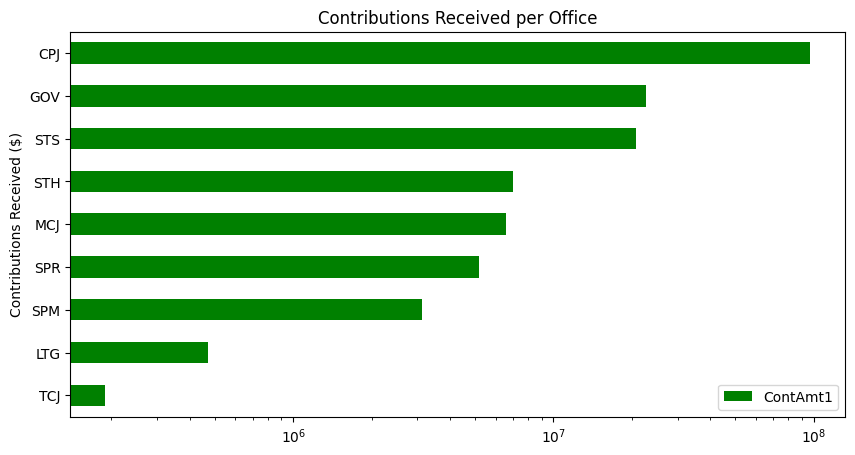

In [11]:
eda.plot_recipients_byOffice(merged_13)